# Exploratory data analysis

In [1]:
!pip3 install -r requirements.txt

In [2]:
import numpy as np
import pandas as pd
from scipy.io import arff
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data, meta = arff.loadarff('autos.arff')

In [4]:
converters = dict()
_ = [converters.update({column:dtype}) for column,dtype in zip(meta.names(),meta.types())]

In [5]:
df = pd.DataFrame(data=data, columns=meta.names())

In [6]:
df.head()

,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,symboling
0,NaN,b'alfa-romero',b'gas',b'std',b'two',b'convertible',b'rwd',b'front',88.6,168.8,...,b'mpfi',3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0,b'3'
1,NaN,b'alfa-romero',b'gas',b'std',b'two',b'convertible',b'rwd',b'front',88.6,168.8,...,b'mpfi',3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0,b'3'
2,NaN,b'alfa-romero',b'gas',b'std',b'two',b'hatchback',b'rwd',b'front',94.5,171.2,...,b'mpfi',2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0,b'1'
3,164.0,b'audi',b'gas',b'std',b'four',b'sedan',b'fwd',b'front',99.8,176.6,...,b'mpfi',3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950.0,b'2'
4,164.0,b'audi',b'gas',b'std',b'four',b'sedan',b'4wd',b'front',99.4,176.6,...,b'mpfi',3.19,3.40,8.0,115.0,5500.0,18.0,22.0,17450.0,b'2'


## Dataframe overview

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
normalized-losses    164 non-null float64
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         205 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null float64
engine-type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null float64
fuel-system          205 non-null object
bore                 201 non-null float64
stroke               201 non-null float64
compression-ratio    205 non-null float64
horsepower           203 non-null float64
peak-rpm             20

In [8]:
print("Number of categorical features %i" %df.select_dtypes(include=['object']).shape[1])
print("Number of numerical features %i" %df.select_dtypes(include=['float']).shape[1])

Number of categorical features 11
Number of numerical features 15


# Univariate analysis

### Getting only categorical values to inspect them

In [9]:
cat_df = df.select_dtypes(include=['object']).copy()
cat_df.head()

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,symboling
0,b'alfa-romero',b'gas',b'std',b'two',b'convertible',b'rwd',b'front',b'dohc',b'four',b'mpfi',b'3'
1,b'alfa-romero',b'gas',b'std',b'two',b'convertible',b'rwd',b'front',b'dohc',b'four',b'mpfi',b'3'
2,b'alfa-romero',b'gas',b'std',b'two',b'hatchback',b'rwd',b'front',b'ohcv',b'six',b'mpfi',b'1'
3,b'audi',b'gas',b'std',b'four',b'sedan',b'fwd',b'front',b'ohc',b'four',b'mpfi',b'2'
4,b'audi',b'gas',b'std',b'four',b'sedan',b'4wd',b'front',b'ohc',b'five',b'mpfi',b'2'


### Null-values check

In [10]:
print("Nulls found: %i " %cat_df.isnull().values.sum())

Nulls found: 0 


### Frequency distributions

Looking at the following charts, we realize that information is **not balanced** at all. 

Here we have a decision to make: **How do we deal with not balanced data?**

In [11]:
def plot_all_cat_distributions(dataframe):
    """ Plot every single category frequency distribution in the same cell"""
    max_shape = np.ceil(dataframe.shape[1] / 2)
    fig = plt.figure(figsize=(20,40))
    for i, col in enumerate(dataframe.columns):
        plt.subplot(max_shape, 2, i+1)
        _ = sns.countplot(y = col, data = dataframe, order=dataframe[col].value_counts().index)
    plt.show()

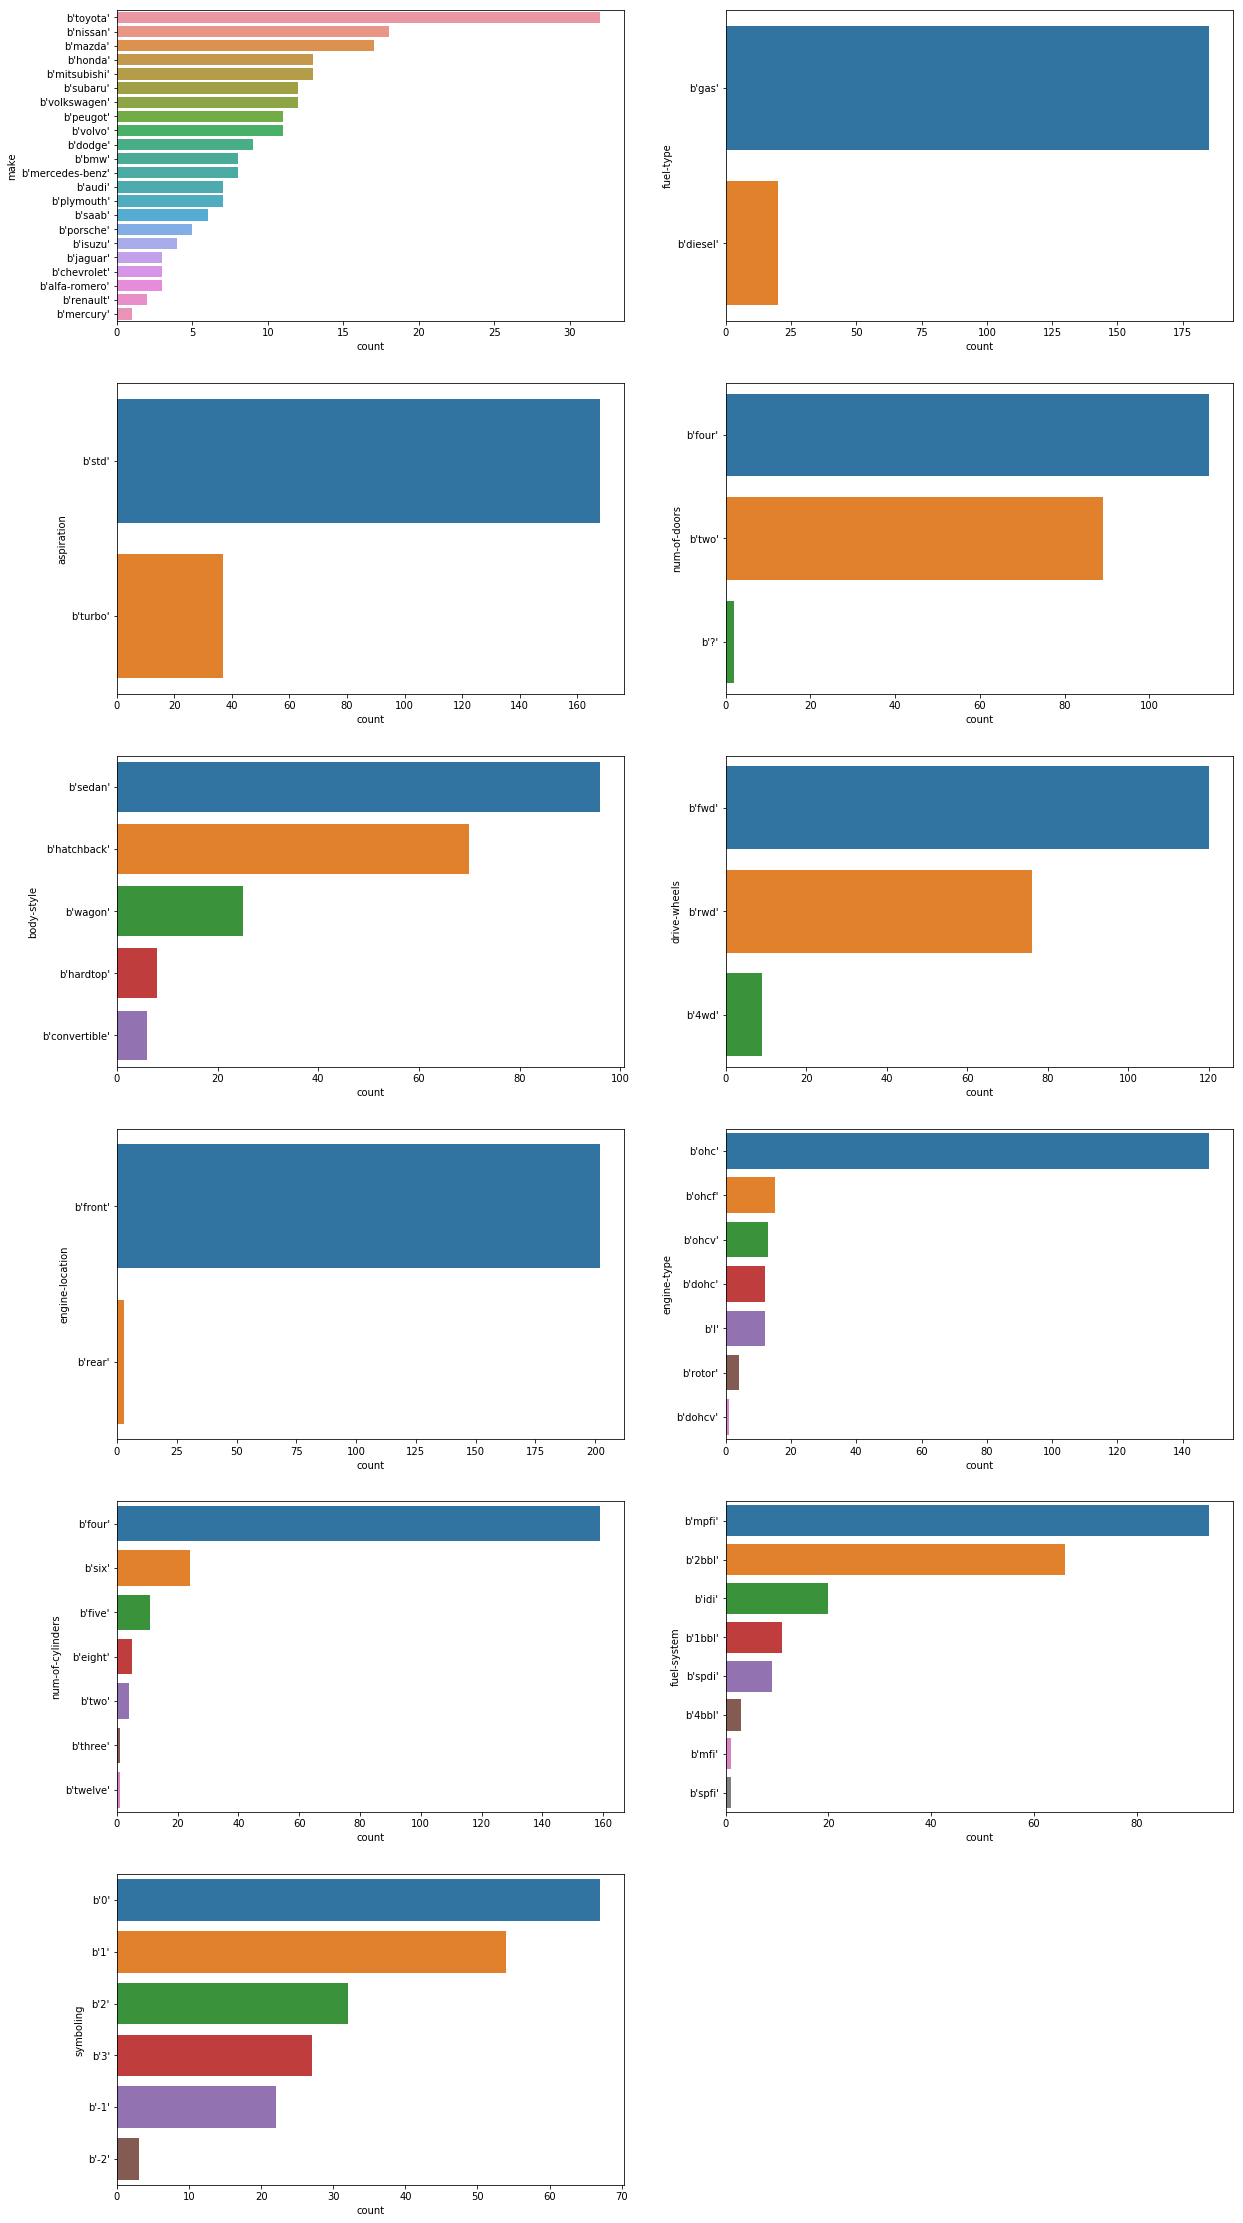

In [12]:
plot_all_cat_distributions(cat_df)

## Getting numerical features to inspect them

In [13]:
num_df = df.select_dtypes(include=['float']).copy()
num_df.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,NaN,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0
1,NaN,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0
2,NaN,94.5,171.2,65.5,52.4,2823.0,152.0,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0
3,164.0,99.8,176.6,66.2,54.3,2337.0,109.0,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950.0
4,164.0,99.4,176.6,66.4,54.3,2824.0,136.0,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,17450.0


### Null-values check

As we found null-values, there's another decision to take: **How are we dealing with null-values?**

In [14]:
print("Nulls found: %i " %num_df.isnull().values.sum())

Nulls found: 57 


### Numerical insights

Some of the most interesting plots for numerical values are *boxplots*. They give information about median, quartils, outliers... in just a single plot.

In [15]:
def plot_all_num_boxplots(dataframe):
    """ Plot every single category frequency distribution in the same cell"""
    max_shape = np.ceil(dataframe.shape[1] / 2)
    fig = plt.figure(figsize=(20,40))
    for i, col in enumerate(dataframe.columns):
        plt.subplot(max_shape, 2, i+1)
        _ = sns.boxplot(y = col, data = dataframe, palette='rainbow', order=dataframe[col].value_counts().index, orient='h', linewidth=2.5)
    plt.show()

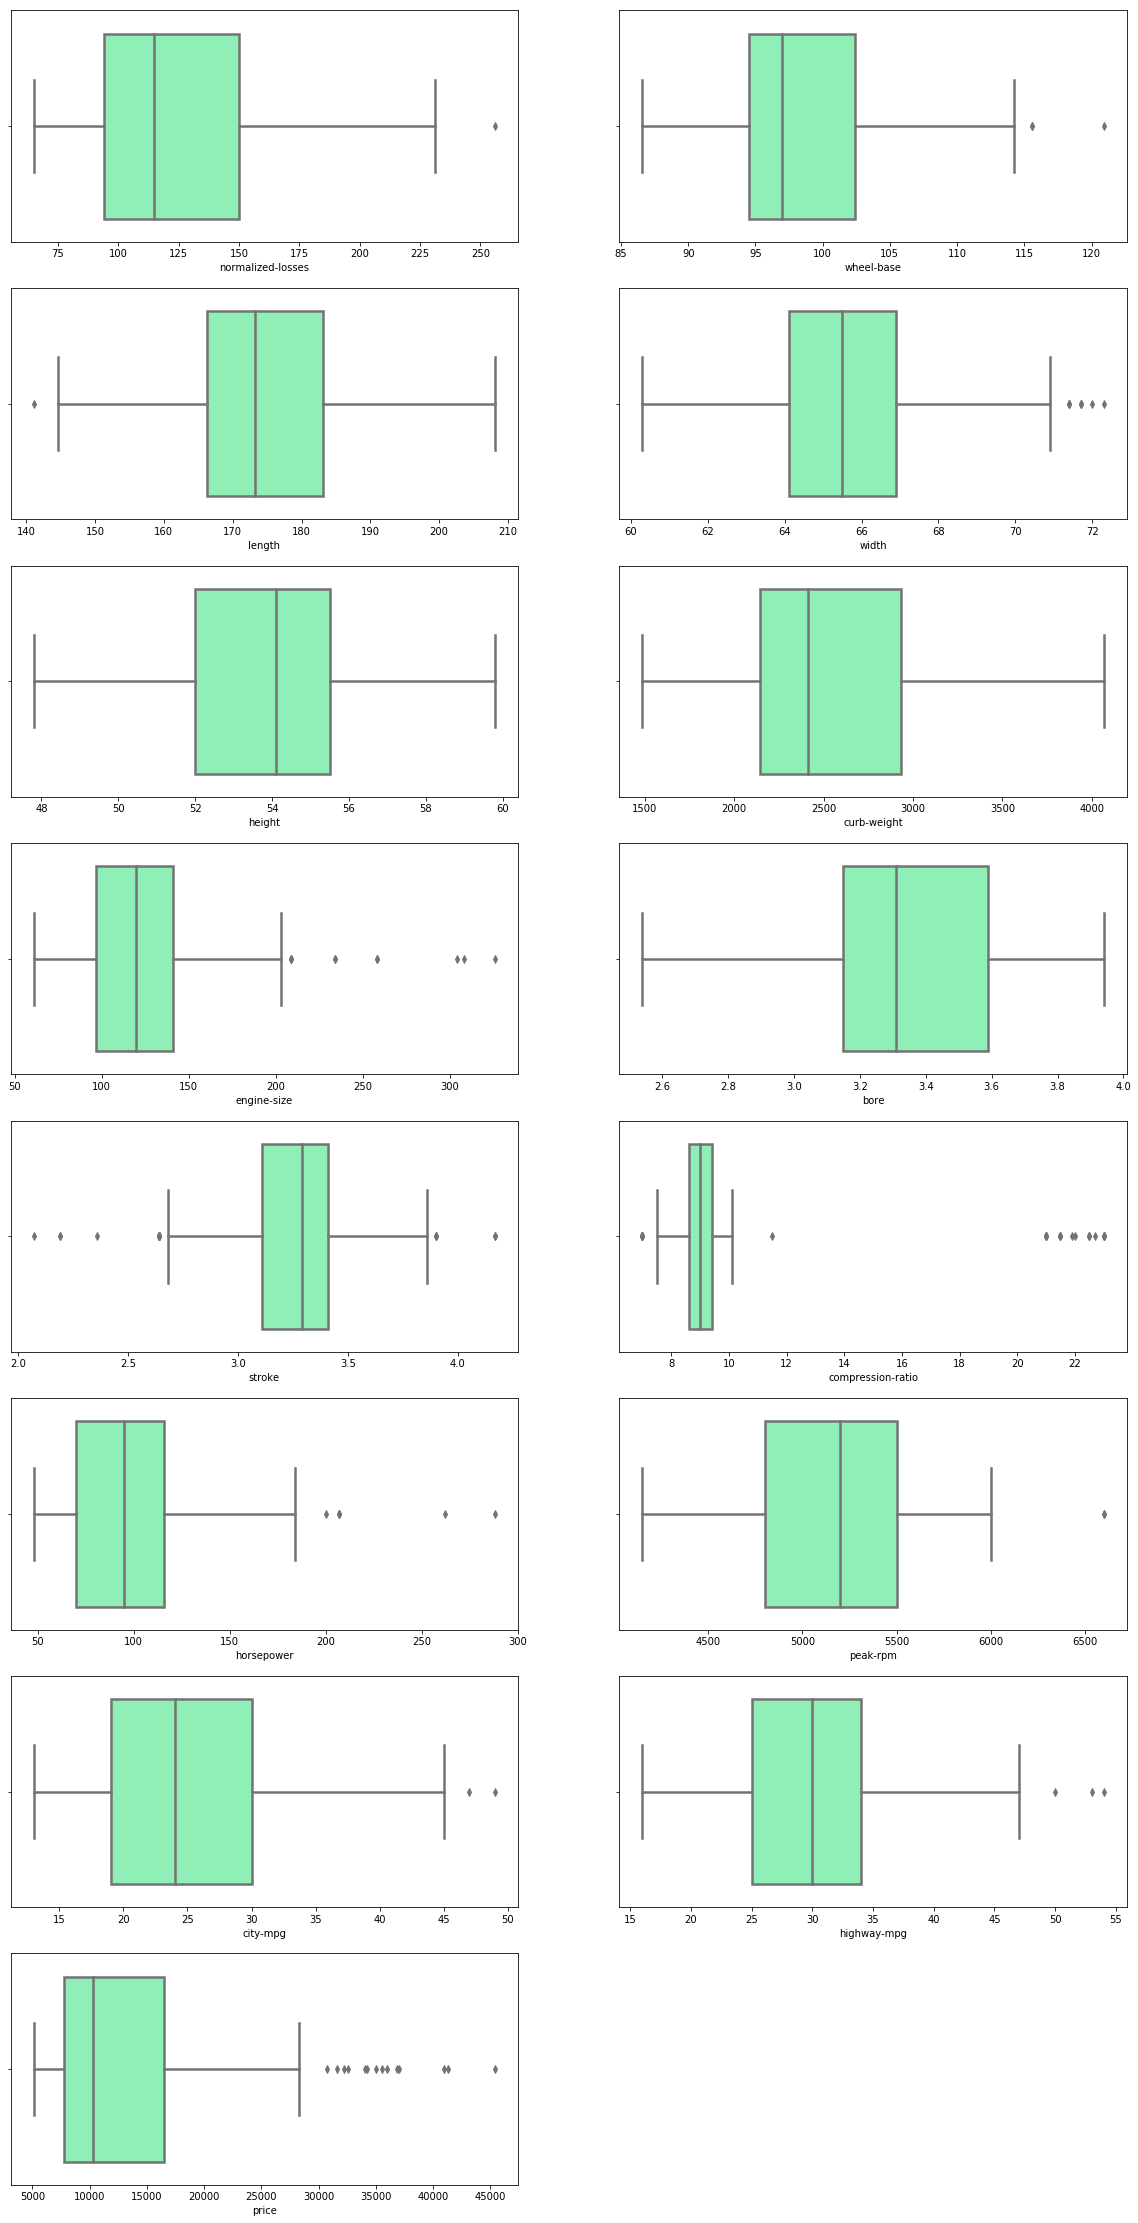

In [16]:
plot_all_num_boxplots(num_df)

TODO:
 - ~~Correlation heatmap~~
 - PCA 

## Correlation heatmap

In [25]:
def correlation_heatmap(corr):
    ax = sns.heatmap(corr)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

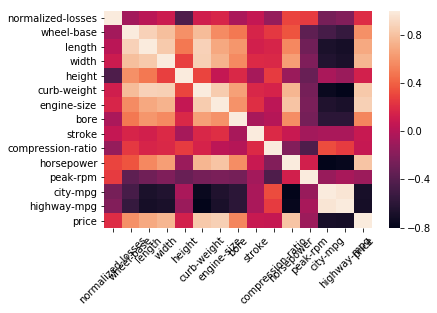

In [26]:
num_corr = num_df.corr()
correlation_heatmap(corr)

In [22]:
cat_df_onehot = cat_df.copy()
cat_df_onehot = pd.get_dummies(cat_df_onehot, columns=['fuel-system'], prefix = ['fuel-system'])
cat_df_onehot.head()

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,symboling,fuel-system_b'1bbl',fuel-system_b'2bbl',fuel-system_b'4bbl',fuel-system_b'idi',fuel-system_b'mfi',fuel-system_b'mpfi',fuel-system_b'spdi',fuel-system_b'spfi'
0,b'alfa-romero',b'gas',b'std',b'two',b'convertible',b'rwd',b'front',b'dohc',b'four',b'3',0,0,0,0,0,1,0,0
1,b'alfa-romero',b'gas',b'std',b'two',b'convertible',b'rwd',b'front',b'dohc',b'four',b'3',0,0,0,0,0,1,0,0
2,b'alfa-romero',b'gas',b'std',b'two',b'hatchback',b'rwd',b'front',b'ohcv',b'six',b'1',0,0,0,0,0,1,0,0
3,b'audi',b'gas',b'std',b'four',b'sedan',b'fwd',b'front',b'ohc',b'four',b'2',0,0,0,0,0,1,0,0
4,b'audi',b'gas',b'std',b'four',b'sedan',b'4wd',b'front',b'ohc',b'five',b'2',0,0,0,0,0,1,0,0
